The following project offers a machine learning solution that assesses the reliability of a fraud detection method. The data for this project is available in CSV format. The project includes initial data exploration, followed by exploratory analysis, model training, and prediction of the reliability of flagged fraud alerts.

IMPORTING NECESSARY LIBRARY


In [1]:
#data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning messages to improve code readability and suppress unnecessary output
import warnings
warnings.filterwarnings("ignore")

# necessary scalers for feature scaling
from sklearn.preprocessing import MinMaxScaler

# data splitting
from sklearn.model_selection import train_test_split


# necessary classifiers for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# model evaluation metrics, cross-validation and classification performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



READING CSV FILE

In [2]:
# Read the data from a CSV file into a DataFrame and display the data
df=pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


BASIC EXPLORATION OF DATA.

In [3]:
# Returns the dimensions of the DataFrame 'data' in the form (rows, columns)
df.shape

(6362620, 11)

In [4]:
# Returns the no of elements in DataFrame 
df.size

69988820

In [5]:
# Returns the column names of the DataFrame 'df'
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# Prints a concise summary of the DataFrame 'df' including the column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Returns the number of missing values in each column of the DataFrame 'df'
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#counting the number of unique elements in a DataFrame'df'
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [9]:
#dropping duplicates in DataFrame 'df'
df.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
#Renaming columns in Dataset to make it more lucid.
df=df.rename(columns={"nameOrig":"Transaction_initiater","nameDest":"Transaction_accepter","type":"Type","amount":"Amount","nameOrig":"Customer_name","oldbalanceOrg":"balance_before_transaction","newbalanceOrig":"balance_after_transaction","oldbalanceDest":"initial_balance","newbalanceDest":"new_balance","isFraud":"fraud","isFlaggedFraud":"fraud_indication"})

In [11]:
df.head()

,step,Type,Amount,Customer_name,balance_before_transaction,balance_after_transaction,Transaction_accepter,initial_balance,new_balance,fraud,fraud_indication
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
# Generating descriptive statistics for categorical columns in the dataset
df.describe(include="all")

,step,Type,Amount,Customer_name,balance_before_transaction,balance_after_transaction,Transaction_accepter,initial_balance,new_balance,fraud,fraud_indication
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [13]:
# Creates a copy of the DataFrame 'df' and assigns it to the variable 'data'
data=df.copy()
data

,step,Type,Amount,Customer_name,balance_before_transaction,balance_after_transaction,Transaction_accepter,initial_balance,new_balance,fraud,fraud_indication
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [14]:
# Remove unnecessary columns from the DataFrame
data=data.drop(['step','Customer_name','Transaction_accepter','Type'],axis=1)

In [15]:
data.head()

,Amount,balance_before_transaction,balance_after_transaction,initial_balance,new_balance,fraud,fraud_indication
0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,181.00,181.0,0.00,0.0,0.0,1,0
3,181.00,181.0,0.00,21182.0,0.0,1,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0


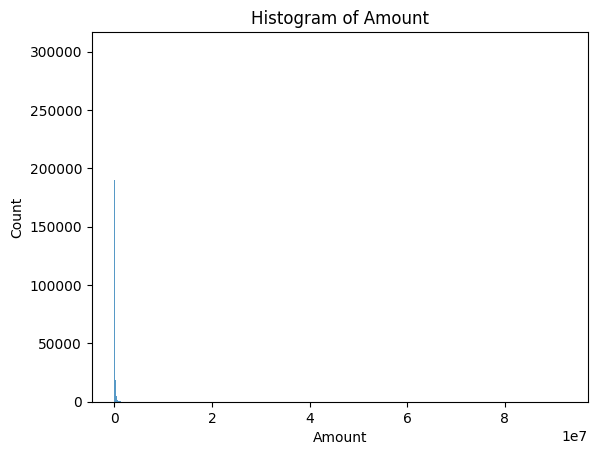

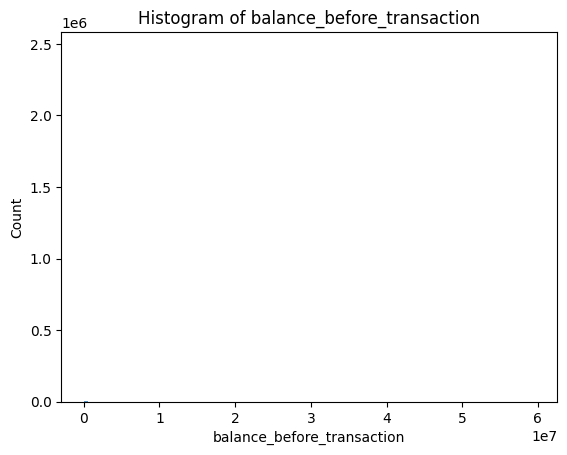

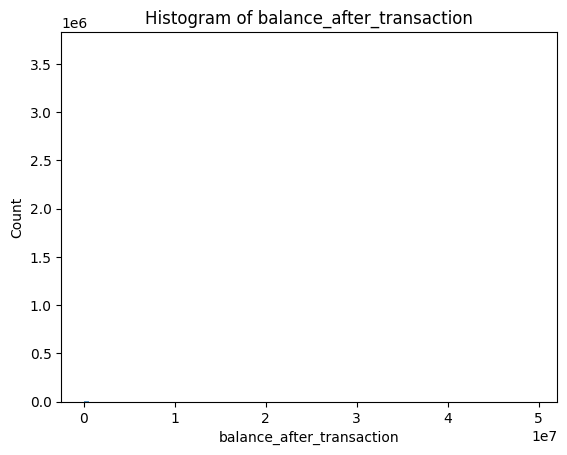

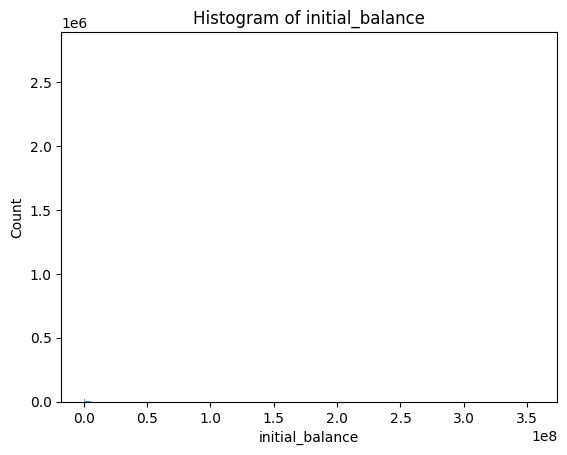

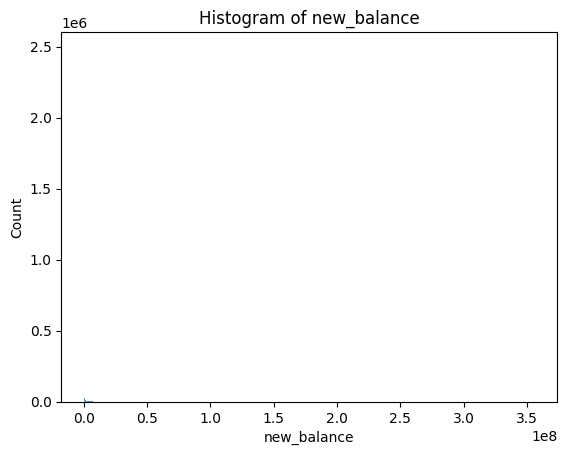

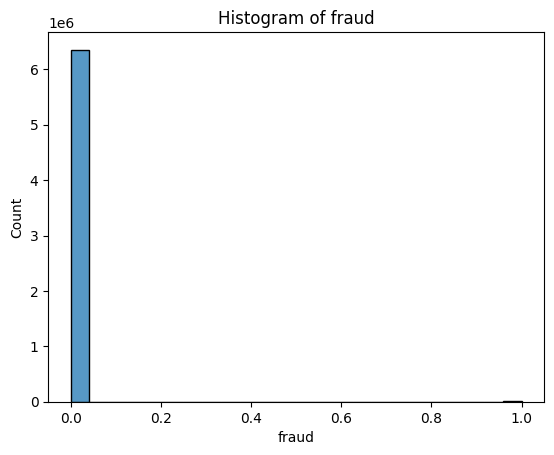

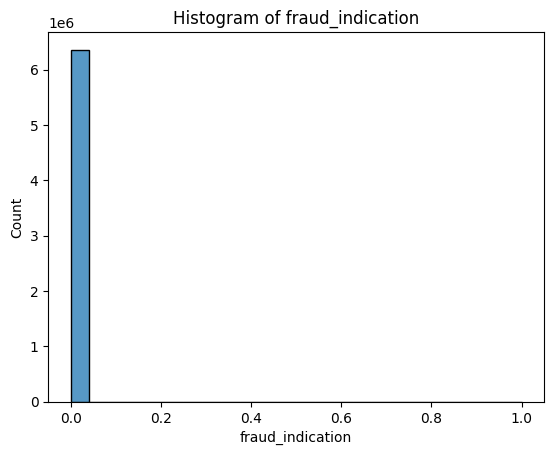

In [16]:
for i in data:
  plt.figure()
  sns.histplot(data[i])
  plt.title(f'Histogram of {i}')
  plt.show()

In [16]:
# Performs normalization on the columns of the 'data' DataFrame using MinMaxScaler.
# Each column, except for the 'Type', is transformed to have values between 0 and 1.

mms = MinMaxScaler() # Normalization

for i in data.columns.to_list():
  data[i] = mms.fit_transform(data[[i]])


data.head()

,Amount,balance_before_transaction,balance_after_transaction,initial_balance,new_balance,fraud,fraud_indication
0,0.000106,0.002855,0.003233,0.000000,0.0,0.0,0.0
1,0.000020,0.000357,0.000391,0.000000,0.0,0.0,0.0
2,0.000002,0.000003,0.000000,0.000000,0.0,1.0,0.0
3,0.000002,0.000003,0.000000,0.000059,0.0,1.0,0.0
4,0.000126,0.000697,0.000603,0.000000,0.0,0.0,0.0


Text(0.5, 1.0, 'Correlation w.r.t fraud_indication')

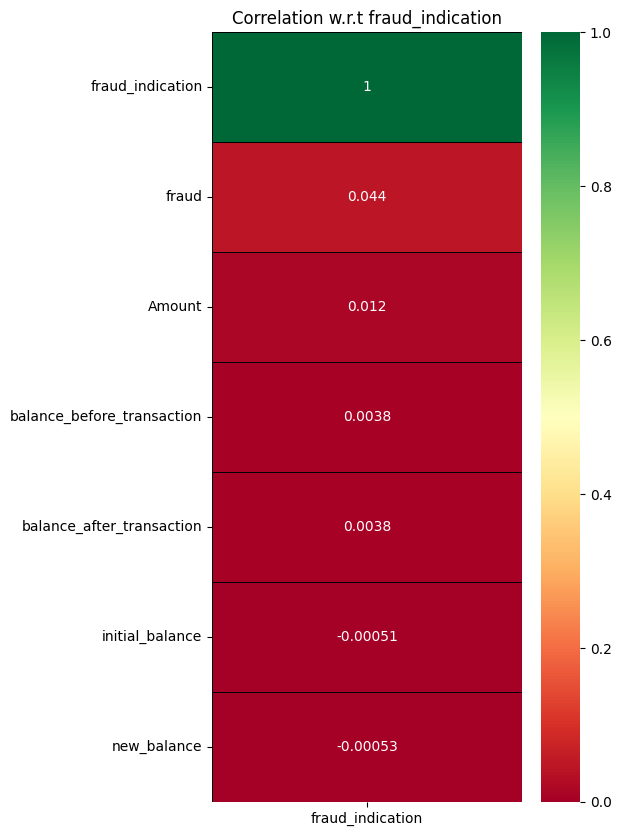

In [17]:
# Generates a heatmap to visualize the correlation between each feature and the 'fraud_indication' column in the 'data' DataFrame.
# The heatmap uses colors to represent the strength and direction of the correlation.
# Only correlations with values between -0.1 and 0.1 are selected for display.

fig, ax = plt.subplots(figsize = (5,10))


corr = data.corrwith(data['fraud_indication']).sort_values(ascending = False).to_frame()
corr.columns = ['fraud_indication']
sns.heatmap(corr,annot = True,cmap = 'RdYlGn',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t fraud_indication')

In [18]:
data=data.drop(['new_balance','initial_balance'],axis=1)

In [19]:
data.head()

,Amount,balance_before_transaction,balance_after_transaction,fraud,fraud_indication
0,0.000106,0.002855,0.003233,0.0,0.0
1,0.000020,0.000357,0.000391,0.0,0.0
2,0.000002,0.000003,0.000000,1.0,0.0
3,0.000002,0.000003,0.000000,1.0,0.0
4,0.000126,0.000697,0.000603,0.0,0.0


In [20]:
# Assigns the features (all columns except 'fraud_indication') to the variable 'x'.
# Assigns the target variable 'fraud_indication' to the variable 'y'.

x = data.drop(columns='fraud_indication')
y = data['fraud_indication']

In [21]:
# Splitting the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape,x_test.shape)

(5090096, 4) (1272524, 4)


MACHINE LEARNING MODELS

In [29]:
from sklearn.model_selection import KFold
#Logistic regresion model
lr = LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
logistic_regression_pred = lr.predict(x_test)

# Accuracy score of model
print(accuracy_score(logistic_regression_pred,y_test))

#The ROC AUC (Receiver Operating Characteristic Area Under the Curve) to evaluate the performance of a model.
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,logistic_regression_pred)))

#Cross Validation score
scores=cross_val_score(lr,x,y,cv=5)
b=scores.mean()
print(f"cross validatin score:{b}")


0.9999974460206644
0.9999976424806133
ROC_AUC Score :  50.00%
cross validatin score:0.9999974853126542


In [28]:
#Decsion Tree Model
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
decision_tree_pred =dt.predict(x_test)
print(dt.score(x_train,y_train))

# Accuracy score of model
print(accuracy_score(decision_tree_pred,y_test))

#The ROC AUC (Receiver Operating Characteristic Area Under the Curve) to evaluate the performance of model.
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,decision_tree_pred)))

#Cross Validation score
scores=cross_val_score(dt,x,y,cv=5)
a=scores.mean()
print(f"cross validatin score:{a}")



1.0
0.9999992141602044
ROC_AUC Score :  100.00%
cross validatin score:0.9999988998242862


In [31]:
#Random Forest Model
rf=RandomForestClassifier(n_estimators = 100,verbose=3,n_jobs=-1)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
random_forest_pred= rf.predict(x_test)

# Accuracy score of model
print(accuracy_score(random_forest_pred,y_test))

#The ROC AUC (Receiver Operating Characteristic Area Under the Curve) to evaluate the performance of model.
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,random_forest_pred)))

#Cross Validation score
scores=cross_val_score(rf,x,y,cv=5)
c=scores.mean()
print(f"cross validatin score:{c}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.4s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   12.4s finished


1.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.9s finished


0.9999984283204089
ROC_AUC Score :  66.67%


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.7s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.1s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.3s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.3s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.7s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100building tree 64 of 100

building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.5s finished


cross validatin score:0.999998742656327


In [33]:
from xgboost import XGBClassifier
#XGB Classifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
print(xgb.score(x_train,y_train))
xgbpred =xgb.predict(x_test)

#Accuracy score of model
print(accuracy_score(xgbpred,y_test))

#The ROC AUC (Receiver Operating Characteristic Area Under the Curve) to evaluate the performance of model.
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,xgbpred)))

#Cross Validation score
scores=cross_val_score(xgb,x,y,cv=5)
e=scores.mean()
print(f"cross validatin score:{e}")



0.9999998035400511
0.9999984283204089
ROC_AUC Score :  66.67%
cross validatin score:0.9999985854883681


In [34]:
#Knn Model
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
knnpred = knn.predict(x_test)

#accuracy score of model
print(accuracy_score(knnpred,y_test))

#The ROC AUC (Receiver Operating Characteristic Area Under the Curve) to evaluate the performance of model.
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,knnpred)))

#Cross Validation score
scores=cross_val_score(knn,x,y,cv=5)
e=scores.mean()
print(f"cross validatin score:{e}")


0.9999988212403067
0.9999984283204089
ROC_AUC Score :  66.67%
cross validatin score:0.999998742656327


In [37]:
#creating a new DataFrame 'DATA1' containing values of accuracy score of model
Data1=pd.DataFrame({"MODELS":["LR","DT","RF","XGB","KNN"],"ACCURACY":[0.99,0.99,1.0,0.99,0.99]})

<Axes: xlabel='MODELS', ylabel='ACCURACY'>

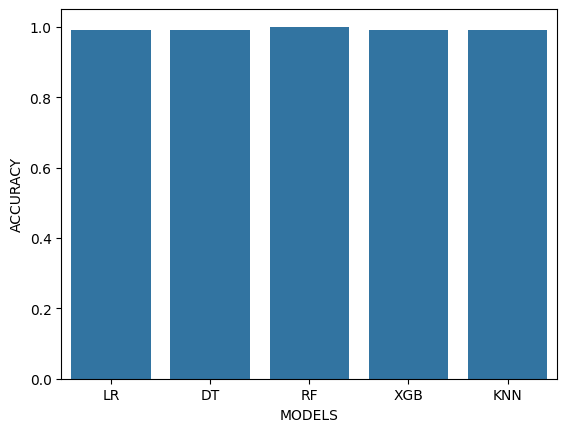

In [38]:
sns.barplot(Data1,x="MODELS",y="ACCURACY")

In [39]:
#creating a new DataFrame 'DATA2' containing values of Cross validation score of model
Data2=pd.DataFrame({"MODELS":["LR","DT","RF","XGB","KNN"],"CROSS_VAL_SCORE":[0.99,0.99,0.99,0.99,0.99]})

<Axes: xlabel='MODELS', ylabel='CROSS_VAL_SCORE'>

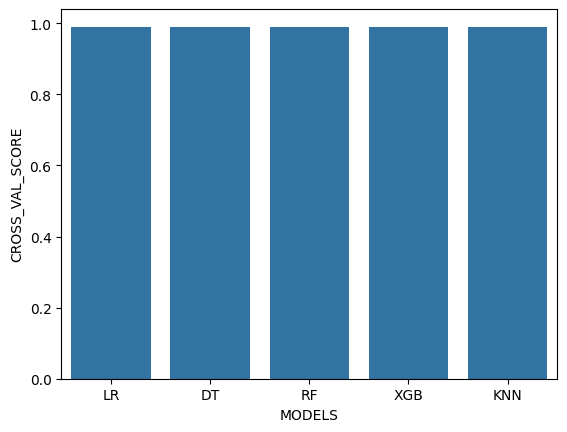

In [40]:
sns.barplot(Data2,x="MODELS",y="CROSS_VAL_SCORE")

In [42]:
#creating a new DataFrame 'DATA3' containing values of ROC_AUC score of model
Data3=pd.DataFrame({"MODELS":["LR","DT","RF","XGB","KNN"],"ROC_AUC":[50,100,66.67,66.67,66.67]})

<Axes: xlabel='MODELS', ylabel='ROC_AUC'>

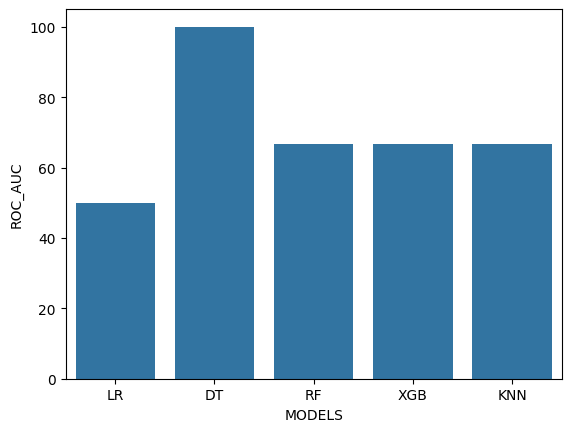

In [43]:
sns.barplot(Data3,x="MODELS",y="ROC_AUC")

Based on the evaluation of the machine learning model's performance metrics, including ROC AUC score, cross-validation score, and accuracy score, we can draw the following conclusions:

1.ROC AUC Score: The model with the highest ROC AUC score (i.e Decision tree classifier= 100%) is preferred as it indicates superior performance in distinguishing between the positive and negative classes. A higher ROC AUC score suggests that the model has a greater ability to correctly classify instances across different thresholds.

2.Cross-Validation Score: Utilizing cross-validation, we compute the average performance metric, such as accuracy or ROC AUC, across different folds of the dataset. This approach allows us to assess the model's generalization ability and robustness to variations in the data. A model with a higher cross-validation score (i.e Decision tree classifier= 0.99) is generally considered superior as it demonstrates better performance across diverse subsets of the dataset.

3.Accuracy Score: Additionally, we consider the accuracy score of the model. The model with the highest accuracy score(i.e Decision tree classifier= 0.99) correctly classifies the largest proportion of instances in the dataset.Thus, selecting the model with the highest accuracy score ensures better overall performance in terms of classification accuracy.

In summary, when selecting the best machine learning model for the task at hand, we prioritize the one with the highest ROC AUC score, as it indicates superior discrimination capability. We also consider the cross-validation score to ensure the model's generalization ability, and we prioritize the accuracy score to ensure the model's ability to correctly classify instances. By considering all these metrics, we can make informed decisions about selecting the most suitable model for our specific problem.